# Bank Nifty Option Price predection

In [1]:
# Data From 25-Feb-2019 From 23_feb-2021 (24 Months data, COllected from NSE Website)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv('Option_Price_NSE.csv')
data.drop('Symbol',axis=1,inplace=True)

# Step 1-- Exploratory Data Analysis

In Explorator Data Analysis, we will analys data and see the relationships between features.

In [4]:
data.isnull().sum()
# There is no null value present in the dataset

Date                        0
Expiry                      0
Option Type                 0
Strike Price                0
Open                        0
No. of contracts            0
Turnover in Lacs            0
Premium Turnover in Lacs    0
Open Int                    0
Change in OI                0
Prev_BN_CP                  0
BankNifty_OP                0
Change_In_BN                0
Prev_Close                  0
dtype: int64

In [6]:
data.head()

,Date,Expiry,Option Type,Strike Price,Open,No. of contracts,Turnover in Lacs,Premium Turnover in Lacs,Open Int,Change in OI,Prev_BN_CP,BankNifty_OP,Change_In_BN,Prev_Close
0,6-Mar-19,7-Mar-19,CE,26400,1177.35,14,77.29,3.37,820,-140,27554.05,27618.1,64.05,1125.00
1,6-Mar-19,7-Mar-19,CE,27300,329.60,36321,200304.84,1992.18,110080,-79580,27554.05,27618.1,64.05,291.95
2,6-Mar-19,7-Mar-19,CE,27400,234.90,151570,836222.09,5618.49,103480,-94460,27554.05,27618.1,64.05,212.85
3,6-Mar-19,7-Mar-19,CE,27500,164.00,498647,2754987.06,12428.56,222200,-137000,27554.05,27618.1,64.05,146.50
4,6-Mar-19,7-Mar-19,CE,27600,123.80,964957,5341891.38,15328.74,372240,3980,27554.05,27618.1,64.05,93.85


In [7]:
data.drop(['No. of contracts','Turnover in Lacs','Premium Turnover in Lacs','Open Int','Change in OI'],axis=1,inplace=True)
#Unable to provide data for these feature so removing it

In [8]:
data.shape
df=data.copy()
# Shape Of DataSet
# Here there are few parameter,which we are not able to pass, so i'm removing them from here

In [9]:
df.head()

,Date,Expiry,Option Type,Strike Price,Open,Prev_BN_CP,BankNifty_OP,Change_In_BN,Prev_Close
0,6-Mar-19,7-Mar-19,CE,26400,1177.35,27554.05,27618.1,64.05,1125.00
1,6-Mar-19,7-Mar-19,CE,27300,329.60,27554.05,27618.1,64.05,291.95
2,6-Mar-19,7-Mar-19,CE,27400,234.90,27554.05,27618.1,64.05,212.85
3,6-Mar-19,7-Mar-19,CE,27500,164.00,27554.05,27618.1,64.05,146.50
4,6-Mar-19,7-Mar-19,CE,27600,123.80,27554.05,27618.1,64.05,93.85


In [10]:
df['Date']=pd.to_datetime(df['Date'])
df['Expiry']=pd.to_datetime(df['Expiry'])
df.dtypes
#Date & Expiry are by default as object type, Converted it into datetime

Date            datetime64[ns]
Expiry          datetime64[ns]
Option Type             object
Strike Price             int64
Open                   float64
Prev_BN_CP             float64
BankNifty_OP           float64
Change_In_BN           float64
Prev_Close             float64
dtype: object

In [11]:
df['Dist_frm_expiry']=df['Expiry']-df['Date']
# Calcuting the distance between Expiry day and present day

In [12]:
df.head()

,Date,Expiry,Option Type,Strike Price,Open,Prev_BN_CP,BankNifty_OP,Change_In_BN,Prev_Close,Dist_frm_expiry
0,2019-03-06,2019-03-07,CE,26400,1177.35,27554.05,27618.1,64.05,1125.00,1 days
1,2019-03-06,2019-03-07,CE,27300,329.60,27554.05,27618.1,64.05,291.95,1 days
2,2019-03-06,2019-03-07,CE,27400,234.90,27554.05,27618.1,64.05,212.85,1 days
3,2019-03-06,2019-03-07,CE,27500,164.00,27554.05,27618.1,64.05,146.50,1 days
4,2019-03-06,2019-03-07,CE,27600,123.80,27554.05,27618.1,64.05,93.85,1 days


# Catogirical Features

In [13]:
# Handling Categorical Feature as ML is not able to understand charector, COnverting it into numerical values
categorical_feature=[feature for feature in df.columns if df[feature].dtype=='O']
categorical_feature

['Option Type']

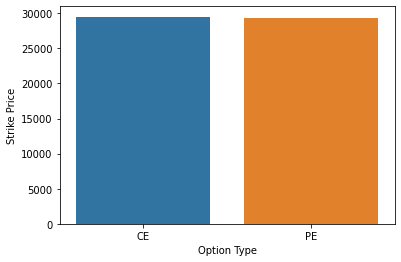

In [14]:
for feature in categorical_feature:
#     sns.barplot(df[feature],df['Strike Price'])
    sns.barplot(x=data[feature],y=data['Strike Price'],data=df,estimator=np.median,ci=False)

In [15]:
numerical_feature=[feature for feature in df if df[feature].dtype !='O']
print(f'{len(numerical_feature)} numerical Features are present\n{numerical_feature}')

9 numerical Features are present
['Date', 'Expiry', 'Strike Price', 'Open', 'Prev_BN_CP', 'BankNifty_OP', 'Change_In_BN', 'Prev_Close', 'Dist_frm_expiry']


In [16]:
# There are two types of numerical Features are present, Descrete & Continious

In [17]:
descrete_numerical_feature=[feature for feature in numerical_feature if len(df[feature].unique()) < 25]
len(descrete_numerical_feature)
# There is no descrete numerical Feature is present, Means all of them are continious numerical featuresabs
df[numerical_feature].dtypes

Date                datetime64[ns]
Expiry              datetime64[ns]
Strike Price                 int64
Open                       float64
Prev_BN_CP                 float64
BankNifty_OP               float64
Change_In_BN               float64
Prev_Close                 float64
Dist_frm_expiry    timedelta64[ns]
dtype: object

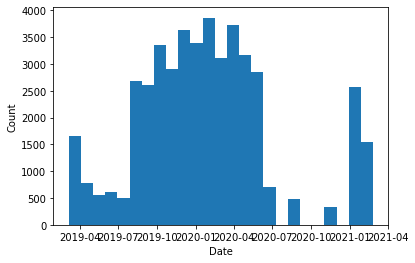

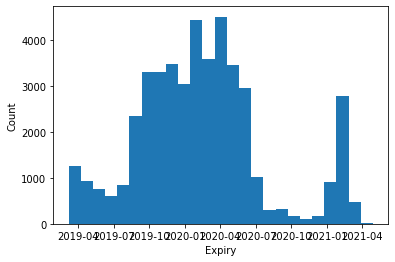

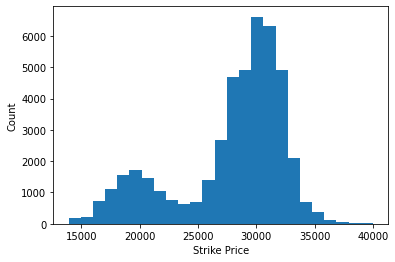

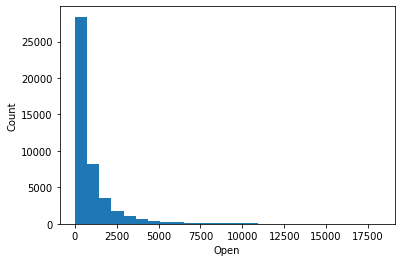

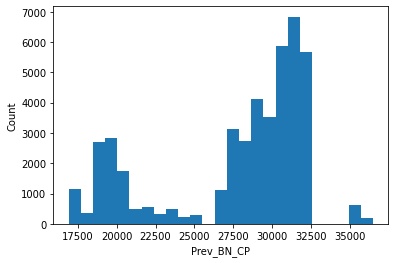

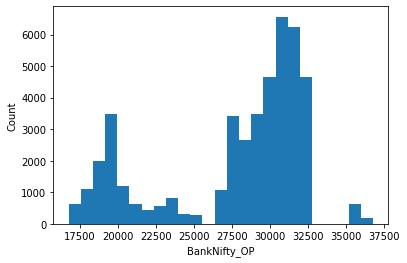

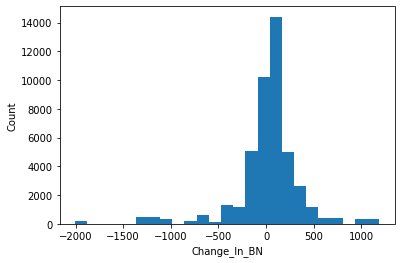

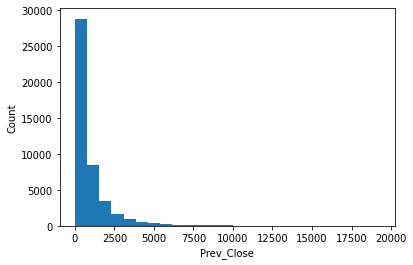

In [18]:
# Analysing the numerical Features
numerical_feature.remove('Dist_frm_expiry')
for feature in numerical_feature:
    plt.hist(df[feature],bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

In [19]:
# As we see, Data is following gaussina  distribution, which has a bell curve...

In [20]:
# Exploratory Data Analysis is Completed, Now in second part we will perform feature engineering

# Feature Engineering

In [21]:
df.head()

,Date,Expiry,Option Type,Strike Price,Open,Prev_BN_CP,BankNifty_OP,Change_In_BN,Prev_Close,Dist_frm_expiry
0,2019-03-06,2019-03-07,CE,26400,1177.35,27554.05,27618.1,64.05,1125.00,1 days
1,2019-03-06,2019-03-07,CE,27300,329.60,27554.05,27618.1,64.05,291.95,1 days
2,2019-03-06,2019-03-07,CE,27400,234.90,27554.05,27618.1,64.05,212.85,1 days
3,2019-03-06,2019-03-07,CE,27500,164.00,27554.05,27618.1,64.05,146.50,1 days
4,2019-03-06,2019-03-07,CE,27600,123.80,27554.05,27618.1,64.05,93.85,1 days


In [22]:
# Lable Encoding-----
# Lable Encodes mapped the integer value to category of option, Ex=0 : CE & 1: PE
from sklearn.preprocessing import LabelEncoder
for label in categorical_feature:
    le = LabelEncoder()   
    df[label]= le.fit_transform(df[label])
df.head()

,Date,Expiry,Option Type,Strike Price,Open,Prev_BN_CP,BankNifty_OP,Change_In_BN,Prev_Close,Dist_frm_expiry
0,2019-03-06,2019-03-07,0,26400,1177.35,27554.05,27618.1,64.05,1125.00,1 days
1,2019-03-06,2019-03-07,0,27300,329.60,27554.05,27618.1,64.05,291.95,1 days
2,2019-03-06,2019-03-07,0,27400,234.90,27554.05,27618.1,64.05,212.85,1 days
3,2019-03-06,2019-03-07,0,27500,164.00,27554.05,27618.1,64.05,146.50,1 days
4,2019-03-06,2019-03-07,0,27600,123.80,27554.05,27618.1,64.05,93.85,1 days


In [23]:
df.drop(['Date','Expiry'],axis=1,inplace=True)
# We already calculate the distance from expiry so these two features are not required anymore

In [24]:
df.head()

,Option Type,Strike Price,Open,Prev_BN_CP,BankNifty_OP,Change_In_BN,Prev_Close,Dist_frm_expiry
0,0,26400,1177.35,27554.05,27618.1,64.05,1125.00,1 days
1,0,27300,329.60,27554.05,27618.1,64.05,291.95,1 days
2,0,27400,234.90,27554.05,27618.1,64.05,212.85,1 days
3,0,27500,164.00,27554.05,27618.1,64.05,146.50,1 days
4,0,27600,123.80,27554.05,27618.1,64.05,93.85,1 days


In [25]:
df.corr()
# Getting corelation between Features

,Option Type,Strike Price,Open,Prev_BN_CP,BankNifty_OP,Change_In_BN,Prev_Close
Option Type,1.000000,-0.032157,0.053802,-0.006343,-0.006984,-0.009047,0.044159
Strike Price,-0.032157,1.000000,-0.050135,0.892948,0.887969,0.004137,-0.056227
Open,0.053802,-0.050135,1.000000,-0.141722,-0.148702,-0.104227,0.981366
Prev_BN_CP,-0.006343,0.892948,-0.141722,1.000000,0.997186,0.041456,-0.143257
BankNifty_OP,-0.006984,0.887969,-0.148702,0.997186,1.000000,0.116236,-0.147233
Change_In_BN,-0.009047,0.004137,-0.104227,0.041456,0.116236,1.000000,-0.064295
Prev_Close,0.044159,-0.056227,0.981366,-0.143257,-0.147233,-0.064295,1.000000


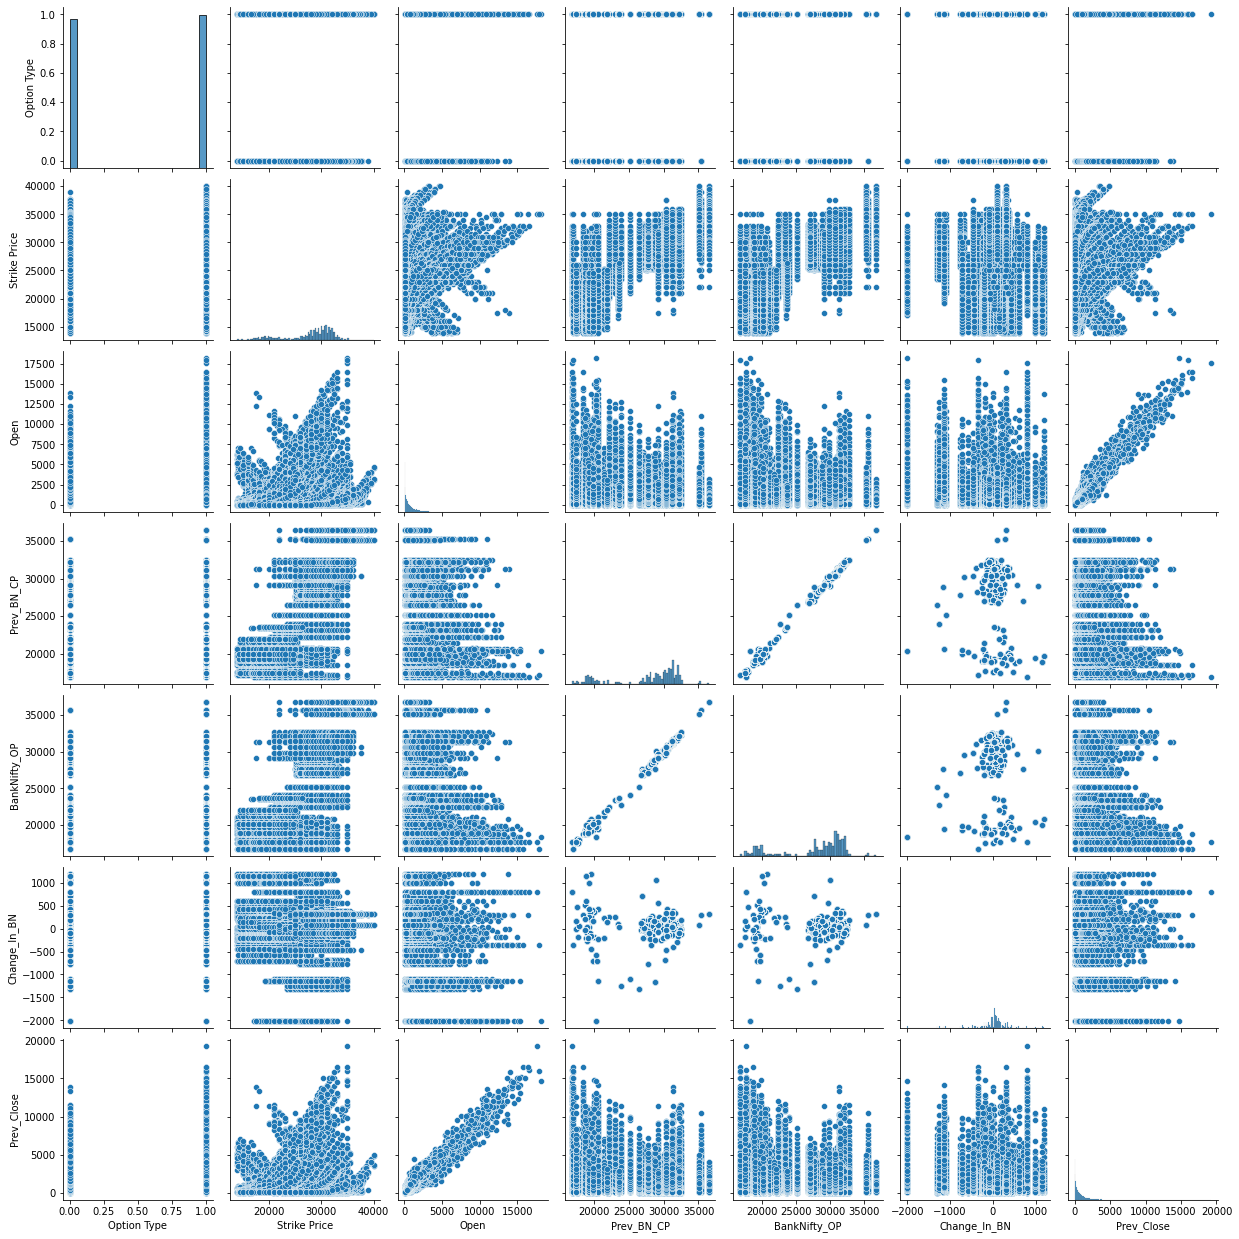

In [26]:
sns.pairplot(df.drop('Dist_frm_expiry',axis=1))

In [27]:
df['Dist_frm_expiry'] = df['Dist_frm_expiry'].dt.days.astype('int64')
df.dtypes
# Converting Datetime format into integer for ML

Option Type          int32
Strike Price         int64
Open               float64
Prev_BN_CP         float64
BankNifty_OP       float64
Change_In_BN       float64
Prev_Close         float64
Dist_frm_expiry      int64
dtype: object

In [28]:
df.head()

,Option Type,Strike Price,Open,Prev_BN_CP,BankNifty_OP,Change_In_BN,Prev_Close,Dist_frm_expiry
0,0,26400,1177.35,27554.05,27618.1,64.05,1125.00,1
1,0,27300,329.60,27554.05,27618.1,64.05,291.95,1
2,0,27400,234.90,27554.05,27618.1,64.05,212.85,1
3,0,27500,164.00,27554.05,27618.1,64.05,146.50,1
4,0,27600,123.80,27554.05,27618.1,64.05,93.85,1


In [29]:
# As we are going to use RandomForesetRegressor, So Feature scaling is not required, 
# but we'll do feature engineering later when will go for another algorithm

# Feature Selection

In [30]:
# here we use lasso regression which penalizse the slope, it will help in removing the feature which doesn't have any impact on o/p

In [31]:
print(f'{len(df.columns)} features are present initialy \n {df.columns}')

8 features are present initialy 
 Index(['Option Type', 'Strike Price', 'Open', 'Prev_BN_CP', 'BankNifty_OP',
       'Change_In_BN', 'Prev_Close', 'Dist_frm_expiry'],
      dtype='object')


In [32]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [33]:
select_feature=SelectFromModel(Lasso(alpha=0.005,random_state=20))

In [34]:
select_feature=select_feature.fit(df.drop('Open',axis=1),df['Open'])

In [35]:
select_feature.get_support()

array([ True,  True,  True,  True,  True,  True,  True])

In [36]:
#As per lasso, all the feature are required for proper o/p. It happens beacuse we did not perform feature scaling, it we did, atleast one feature got removed.

In [37]:
# Using Train test Split to split the data for testing & training

In [38]:
final_dataset=df.copy()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_dataset.drop(['Open'],axis=1),final_dataset['Open'],test_size=0.3,random_state=20)

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
rf=RandomForestRegressor(n_estimators=5)

In [41]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=5)

In [42]:
rf.score(X_test,y_test)
# it shows 97.91 % accuracy, will check with confission matrix as well

0.9795211010444375

In [43]:
y_pred=rf.predict(X_test)

In [44]:
rf.predict([[0,35400,35419,35754,334,388,1]])

array([468.61])

In [48]:
from sklearn.model_selection import cross_val_score
cv=cross_val_score(rf,X_train,y_train,cv=10,n_jobs=-1)
cv.mean()

0.9793891778755098

In [49]:
rf.score(X_test,y_test)

0.9795211010444375

In [50]:
## We are getting 97.86 % accuracy in this model without feature scaling.................

In [51]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9812256472836162

In [52]:
#---------------------------The End------------------------------

# With Feature Scalling

In [107]:
dff=df.copy()
dff.head()

,Option Type,Strike Price,Open,Prev_BN_CP,BankNifty_OP,Change_In_BN,Prev_Close,Dist_frm_expiry
0,0,26400,1177.35,27554.05,27618.1,64.05,1125.00,1
1,0,27300,329.60,27554.05,27618.1,64.05,291.95,1
2,0,27400,234.90,27554.05,27618.1,64.05,212.85,1
3,0,27500,164.00,27554.05,27618.1,64.05,146.50,1
4,0,27600,123.80,27554.05,27618.1,64.05,93.85,1


# Feature Scalling

In [108]:
# There are mainly 2 Type of scalling alogorithm is used, MinMaxScaller & StandardScaler

In [109]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(dff.drop(['Open'],axis=1),dff['Open'],test_size=0.3,random_state=20)

In [110]:
scaling=MinMaxScaler()

In [111]:
scale_feature=[feature for feature in X_train.columns if X_train[feature].dtype!='O']

In [112]:
scaling.fit(X_train[scale_feature])

MinMaxScaler()

In [113]:
scaling.transform(X_train[scale_feature])

array([[0.        , 0.27203065, 0.19267302, ..., 0.76066061, 0.04017355,
        0.10752688],
       [1.        , 0.69348659, 0.73303079, ..., 0.74113964, 0.05239283,
        0.84946237],
       [1.        , 0.73563218, 0.7655013 , ..., 0.64337821, 0.0671723 ,
        0.02150538],
       ...,
       [1.        , 0.60536398, 0.70114898, ..., 0.63993425, 0.00478281,
        0.10752688],
       [1.        , 0.61685824, 0.36107634, ..., 0.23666249, 0.31542938,
        0.13978495],
       [1.        , 0.55172414, 0.67907283, ..., 0.57991547, 0.00176045,
        0.08602151]])

In [114]:
final_train_dataset=pd.DataFrame(scaling.transform(X_train[scale_feature]),columns=scale_feature)

In [115]:
# scaling.fit([y_train])
# y_train=pd.DataFrame(scaling.transform([y_train]))

In [116]:
final_train_dataset.shape,y_train.shape

((31508, 7), (31508,))

In [117]:
rf.score(final_train_dataset,y_train)

-0.4133912890025597

In [118]:
final_train_dataset.head()

,Option Type,Strike Price,Prev_BN_CP,BankNifty_OP,Change_In_BN,Prev_Close,Dist_frm_expiry
0,0.0,0.272031,0.192673,0.217189,0.760661,0.040174,0.107527
1,1.0,0.693487,0.733031,0.741738,0.741140,0.052393,0.849462
2,1.0,0.735632,0.765501,0.757837,0.643378,0.067172,0.021505
3,1.0,0.651341,0.740018,0.749246,0.745429,0.019791,0.225806
4,0.0,0.697318,0.791788,0.780877,0.626910,0.026887,0.107527


# Feature Selection

In [88]:
select=SelectFromModel(Lasso(alpha=0.005,random_state=20))

In [89]:
select_feature=select.fit(final_train_dataset,y_train)

In [90]:
select_feature.get_support()

array([ True,  True,  True,  True,  True,  True,  True])

In [91]:
selected_feature=final_train_dataset.columns[select_feature.get_support()]

In [92]:
selected_feature

Index(['Option Type', 'Strike Price', 'Prev_BN_CP', 'BankNifty_OP',
       'Change_In_BN', 'Prev_Close', 'Dist_frm_expiry'],
      dtype='object')

In [72]:
#Performing Train Test Split

In [94]:
from sklearn.ensemble import RandomForestRegressor

In [95]:
rf=RandomForestRegressor()

In [96]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [97]:
rf.predict(X_test)

array([ 309.872 ,   19.823 ,  793.761 , ..., 1408.2315,  218.991 ,
        243.919 ])

In [98]:
rf.score(X_test,y_test)

0.9831595896700561

In [99]:
y_pred=rf.predict(X_test)

In [100]:
rf.score(X_test,y_test)

0.9831595896700561

In [101]:
# We are getting 98.33 % accuracy in randomforest even after scalling, As we observe there is no big differece in o/p of scalled fature
# vs non scaled feature, as we know, feature scalling is not requeired in Randomforest, so we not go with KNearestNighbours where scalling is required
# beacuse we use ecludian & Manhatton Distance in this algorithm

In [102]:
final_train_dataset.head()

,Option Type,Strike Price,Prev_BN_CP,BankNifty_OP,Change_In_BN,Prev_Close,Dist_frm_expiry
0,0.0,0.272031,0.192673,0.217189,0.760661,0.040174,0.107527
1,1.0,0.693487,0.733031,0.741738,0.741140,0.052393,0.849462
2,1.0,0.735632,0.765501,0.757837,0.643378,0.067172,0.021505
3,1.0,0.651341,0.740018,0.749246,0.745429,0.019791,0.225806
4,0.0,0.697318,0.791788,0.780877,0.626910,0.026887,0.107527


In [103]:
from sklearn.neighbors import KNeighborsRegressor

In [104]:
knn=KNeighborsRegressor(n_neighbors=10)

In [105]:
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [106]:
knn.score(X_test,y_test)

0.9812256472836162

In [240]:
# We are getting 97.67 accuracy with KNN model, 

In [583]:
import pickle
#open a file, where we want to store data
file = open('option_prediction_model.pkl','wb')

#dump information to that file
pickle.dump(rf,file)

In [584]:
X_test.columns

Index(['Option Type', 'Strike Price', 'Close', 'Prev_BN_CP', 'BankNifty_OP',
       'Change_In_BN', 'Dist_frm_expiry'],
      dtype='object')

In [535]:
# As input we don't have too much data to provide so i'm removing the data which i'm not able to provide

In [536]:
#Feature Selection --Lasso Method

In [1080]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [1081]:
selecting_feature=SelectFromModel(Lasso(alpha=0.005,random_state=20))

In [1082]:
selecting_feature.fit(final_dataset.drop(['Open'],axis=1),df['Open'])

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=20))

In [1083]:
selecting_feature.get_support()

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True])

In [1084]:
selected_feature=final_dataset.drop(['Open'],axis=1).columns[selecting_feature.get_support()]
print(f'Total feature present {len(final_dataset.columns)-1}')
print(f'{len(selected_feature)} feature selected by Lasso')

Total feature present 12
11 feature selected by Lasso


In [1085]:
selected_feature

Index(['Option Type', 'Strike Price', 'No. of contracts',
       'Premium Turnover in Lacs', 'Open Int', 'Change in OI', 'Prev_BN_CP',
       'BankNifty_OP', 'Change_In_BN', 'Prev_Close', 'Dist_frm_expiry'],
      dtype='object')

In [594]:
final_dataset.drop('BankNifty_OP',inplace=True,axis=1)

In [595]:
final_dataset.head()

,Open,Option Type,Strike Price,Close,Prev_BN_CP,Change_In_BN,Dist_frm_expiry
0,2544.95,0,0.401515,0.138094,0.493111,0.645016,0.02
1,2000.00,0,0.420455,0.112564,0.493111,0.645016,0.02
2,1519.00,0,0.439394,0.086719,0.493111,0.645016,0.02
3,1007.80,0,0.458333,0.060314,0.493111,0.645016,0.02
4,861.90,0,0.465909,0.050113,0.493111,0.645016,0.02


In [596]:
# implementing Train test split after applying feature selection

In [598]:
X_train, X_test, y_train, y_test=train_test_split(final_dataset.drop('Open',axis=1),final_dataset['Open'],test_size=0.3,random_state=20)

In [599]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10)

In [600]:
rf.score(X_test,y_test)

0.971010699751165

In [604]:
X_test.head()

,Option Type,Strike Price,Close,Prev_BN_CP,Change_In_BN,Dist_frm_expiry
18815,0,0.666667,0.015056,0.639384,0.621865,0.346667
47827,1,0.511364,0.005582,0.648388,0.616104,0.226667
37091,0,0.723485,0.117334,0.801328,0.780402,0.340000
15669,0,0.678030,0.032097,0.764184,0.624200,0.060000
20876,0,0.617424,0.003059,0.607480,0.648347,0.053333


In [613]:
rf.predict([[0,37000,645,36764,311,0]])

array([17577.045])

In [655]:
# Without scalling
X_train, X_test, y_train, y_test=train_test_split(df.drop('Open',axis=1),df['Open'],test_size=0.3,random_state=20)

In [656]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10)

In [657]:
rf.score(X_test,y_test)

0.9716190235070551

In [658]:
df.head()

,Option Type,Strike Price,Open,Close,Prev_BN_CP,BankNifty_OP,Change_In_BN,Dist_frm_expiry
0,0,24500,2544.95,2659.40,26869.0,26934.2,65.2,3
1,0,25000,2000.00,2167.75,26869.0,26934.2,65.2,3
2,0,25500,1519.00,1670.05,26869.0,26934.2,65.2,3
3,0,26000,1007.80,1161.55,26869.0,26934.2,65.2,3
4,0,26200,861.90,965.10,26869.0,26934.2,65.2,3


In [853]:
# Machine Learning PipelInes
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [893]:
pipeline_lr=Pipeline([('Scaler1',StandardScaler()),
             ('PCA1',PCA(n_components=2)),
             ('Regressor1',LinearRegression())])

In [894]:
pipeline_knn=Pipeline([('Scaler2',StandardScaler()),
             ('PCA2',PCA(n_components=2)),
             ('Regressor2',KNeighborsRegressor())])

In [895]:
pipeline_rf=Pipeline([('Scaler3',StandardScaler()),
             ('PCA3',PCA(n_components=2)),
             ('Regressor3',RandomForestRegressor())])

In [896]:
pipelines=[pipeline_lr,pipeline_knn,pipeline_rf]

In [897]:
best_accuracy=0.0
best_regressor=0
best_pipeline=''

In [900]:
pipe_dict={0:'LinearRegression',1:'KNeighborsRegressor',2:'RandomForestRegressor'}

In [901]:
for pipe in pipelines:
    print(pipe)
    pipe.fit(X_train,y_train)

Pipeline(steps=[('Scaler1', StandardScaler()), ('PCA1', PCA(n_components=2)),
                ('Regressor1', LinearRegression())])
Pipeline(steps=[('Scaler2', StandardScaler()), ('PCA2', PCA(n_components=2)),
                ('Regressor2', KNeighborsRegressor())])
Pipeline(steps=[('Scaler3', StandardScaler()), ('PCA3', PCA(n_components=2)),
                ('Regressor3', RandomForestRegressor())])


In [908]:
for i,model in enumerate(pipelines):
    print(f'{pipe_dict[i]} has {model.score(X_train,y_train)} accuracy')

LinearRegression has 0.5586213402779046 accuracy
KNeighborsRegressor has 0.8250171889273406 accuracy
RandomForestRegressor has 0.9639402507150271 accuracy


In [909]:
final_dataset.head()

,Open,Option Type,Close,Strike Price,Prev_BN_CP,BankNifty_OP,Change_In_BN,Dist_frm_expiry
0,2544.95,0,2659.40,-0.374901,0.081623,0.088118,0.087727,0.227562
1,2000.00,0,2167.75,-0.276844,0.081623,0.088118,0.087727,0.227562
2,1519.00,0,1670.05,-0.180730,0.081623,0.088118,0.087727,0.227562
3,1007.80,0,1161.55,-0.086482,0.081623,0.088118,0.087727,0.227562
4,861.90,0,965.10,-0.049289,0.081623,0.088118,0.087727,0.227562


In [921]:
rf.predict([[1,524.15,37000,36600,36600,30000000,0]])

array([812.3665])